<a href="https://colab.research.google.com/github/aravindchakravarti/Deep_Learning_EVA_4/blob/master/Deep_Learning_EVA_4/S12_TinyImageNet/S12B/bbox_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is JSON File?

* JSON stands for "JavaScript Object Notation (JSON) format"
* In Python primarly used for 'Object Serialization' i.e., for saving the objects
* JSON stores everything in terms of **Dictionaries**. 

# Example JSON File:

```
{
  "info": {
    "year": 2020,
    "version": "1",
    "description": "Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)",
    "contributor": "",
    "url": "http://www.robots.ox.ac.uk/~vgg/software/via/",
    "date_created": "Sun Apr 19 2020 20:30:25 GMT+0530 (IST)"
  },
  "images": [
    {
      "id": 0,
      "width": 729,
      "height": 486,
      "file_name": "dog-1.jpg",
      "license": 1,
      "date_captured": ""
    },
    {
      "id": 1,
      "width": 645,
      "height": 380,
      "file_name": "dog-2.jpg",
      "license": 1,
      "date_captured": ""
    },
```
In the above file we can see that, there are some **keys** and related **values**. For example, ***info***, ***year***, ***version*** etc are keys. Under each key there are some values.

Lets see some specific details present in current JSON file.
 1. info  : Information about the file, authors, and date of creation
 2. images : Contains information about the 
  * id : Image ID (which starts from zero and counts number of images)
  * width: Width of the image
  * height: Height of the image
  * file_name: Name of the image file
  * licence : (if any) licences
  * date_captured: Some EXIF data

```
"annotations": [
    {
      "id": 0,
      "image_id": "0",
      "segmentation": [
        83,
        13,
        618,
        13,
        618,
        475,
        83,
        475
      ],
      "area": 247170,
      "bbox": [
        83,
        13,
        535,
        462
      ],
      "iscrowd": 0
    },
    {
      "id": 1,
      "image_id": "1",

```

Above JSON file provies some more information about annotation:
* id : Unique ID
* image_id : ID number corresponding to image
* Segmentation: Co-ordinates of bounding box. In the current file it says, 
  * 83 - 13 : Top left X axis and Y Axis
  * 618 - 13 : Top right X axis and Y Axis
  * 618 - 475 : Bottom right X axis and Y Axis
  * 83 - 475 : Bottom left X axis and Y Axis
* area : Area of the segmentation. May useful for calculating IOU
* bbox : Bounding box co-ordinates 
  * 83 - 13 : Start point of bonding box
  * 535 - 462: Width and height of bonding box from starting point
* iscrowd : Whether it is a single object or group of objects
  

In [12]:
import json
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import numpy as np


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# Loading the JSON file 
with open ('via_export_coco.json') as fh:
  data = json.load(fh)

In [4]:
# See the data
print (data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [14]:
# Getting the images and its annotations
image_details = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotation_details = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())

image_details.head()

,id,width,height,file_name,license,date_captured
0,0,729,486,dog-1.jpg,1,
1,1,645,380,dog-2.jpg,1,
2,2,729,486,dog-3.jpg,1,
3,3,272,185,dog-4.jpg,1,
4,4,730,455,dog-5.jpg,1,


In [15]:
annotation_details.head()

,id,image_id,segmentation,area,bbox,iscrowd
0,0,0,"[83, 13, 618, 13, 618, 475, 83, 475]",247170,"[83, 13, 535, 462]",0
1,1,1,"[5, 52, 622, 52, 622, 364, 5, 364]",192504,"[5, 52, 617, 312]",0
2,2,2,"[41, 14, 696, 14, 696, 477, 41, 477]",303265,"[41, 14, 655, 463]",0
3,3,3,"[4, 8, 260, 8, 260, 174, 4, 174]",42496,"[4, 8, 256, 166]",0
4,4,4,"[123, 112, 389, 112, 389, 452, 123, 452]",90440,"[123, 112, 266, 340]",0


In [0]:
# Extracting bonding box dimensions

BBox_df = pd.concat([image_details, annotation_details], 1)[['file_name', 'width', 'height', 'bbox']]

x_list = []
y_list = []
w_list = []
h_list = []

for row in range (BBox_df.shape[0]):
  x = BBox_df['bbox'][row][0]
  y = BBox_df['bbox'][row][1]
  w = BBox_df['bbox'][row][2]
  h = BBox_df['bbox'][row][3]
  x_list.append(x)
  y_list.append(y)
  w_list.append(w)
  h_list.append(h)

box_df = pd.DataFrame(list(zip(x_list, y_list, w_list, h_list)), columns =['x', 'y', 'box_width', 'box_height'])
BBox_df = pd.concat([BBox_df, box_df], 1)
BBox_df = BBox_df.drop('bbox', axis =1)

In [21]:
BBox_df.head()


,file_name,width,height,x,y,box_width,box_height
0,dog-1.jpg,729,486,83,13,535,462
1,dog-2.jpg,645,380,5,52,617,312
2,dog-3.jpg,729,486,41,14,655,463
3,dog-4.jpg,272,185,4,8,256,166
4,dog-5.jpg,730,455,123,112,266,340


In [0]:
# Lets normalize the data
#Normalize the Box Dimensions based on Image Height and Width
BBox_df['x'] = BBox_df['x'] / BBox_df['width']
BBox_df['y'] = BBox_df['y'] / BBox_df['height']
BBox_df['box_width'] = BBox_df['box_width'] / BBox_df['width']
BBox_df['box_height'] = BBox_df['box_height'] / BBox_df['height']


In [23]:
BBox_df.head()

,file_name,width,height,x,y,box_width,box_height
0,dog-1.jpg,729,486,0.113855,0.026749,0.733882,0.950617
1,dog-2.jpg,645,380,0.007752,0.136842,0.956589,0.821053
2,dog-3.jpg,729,486,0.056241,0.028807,0.898491,0.952675
3,dog-4.jpg,272,185,0.014706,0.043243,0.941176,0.897297
4,dog-5.jpg,730,455,0.168493,0.246154,0.364384,0.747253


In [24]:
hw_array = BBox_df[["box_width", "box_height"]].to_numpy()
hw_array.shape

(50, 2)

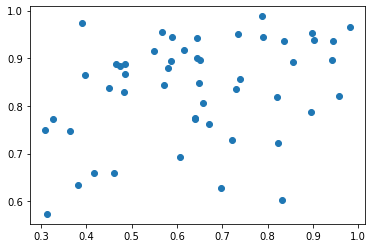

In [33]:
# Visualize the data
plt.scatter(hw_array[:,0], hw_array[:,1])

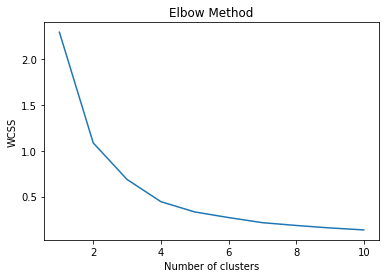

In [35]:
#Elbow Method
#Determine the optimal number of clusters

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(hw_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
# find cluster centers for selected number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)

In [37]:
kmeans.cluster_centers_

array([[0.64212148, 0.84488542],
       [0.41330322, 0.78853922],
       [0.87588088, 0.87157261]])

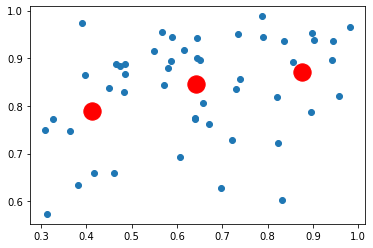

In [38]:
plt.scatter(hw_array[:,0], hw_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()